In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Column, Integer, String, Float, text

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
# Declare a Base using 'automap_base()'
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Assign the measurement class to a variable called 'Measurement'
Measurement = Base.classes.measurement

# Assign the station class to a variable called 'Station'
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
measurement = session.query(Measurement)
insp = inspect(engine)
columns = insp.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [24]:
measurement = session.query(Measurement)
for obj in measurement:
    print(obj.id, obj.date, obj.prcp)

1 2010-01-01 0.08
2 2010-01-02 0.0
3 2010-01-03 0.0
4 2010-01-04 0.0
5 2010-01-06 None
6 2010-01-07 0.06
7 2010-01-08 0.0
8 2010-01-09 0.0
9 2010-01-10 0.0
10 2010-01-11 0.01
11 2010-01-12 0.0
12 2010-01-14 0.0
13 2010-01-15 0.0
14 2010-01-16 0.0
15 2010-01-17 0.0
16 2010-01-18 0.0
17 2010-01-19 0.0
18 2010-01-20 0.0
19 2010-01-21 0.0
20 2010-01-22 0.0
21 2010-01-23 0.0
22 2010-01-24 0.01
23 2010-01-25 0.0
24 2010-01-26 0.04
25 2010-01-27 0.12
26 2010-01-28 0.0
27 2010-01-30 None
28 2010-01-31 0.03
29 2010-02-01 0.01
30 2010-02-03 None
31 2010-02-04 0.01
32 2010-02-05 0.0
33 2010-02-06 0.0
34 2010-02-07 0.0
35 2010-02-08 0.0
36 2010-02-09 0.0
37 2010-02-11 0.0
38 2010-02-12 0.02
39 2010-02-13 0.01
40 2010-02-14 0.0
41 2010-02-15 0.0
42 2010-02-16 0.0
43 2010-02-17 0.0
44 2010-02-19 None
45 2010-02-20 0.03
46 2010-02-21 0.0
47 2010-02-22 0.0
48 2010-02-23 0.0
49 2010-02-24 0.0
50 2010-02-25 0.0
51 2010-02-26 0.0
52 2010-02-28 0.0
53 2010-03-01 0.01
54 2010-03-02 0.0
55 2010-03-03 0.0
56

In [15]:
station = session.query(Station)

In [25]:
# # Display Measurement's row's columns and data in dictionary format
# first_row_m = session.query(Measurement).first()
# first_row_m.__dict__

In [26]:
# # Display Station's row's columns and data in dictionary format
# first_row_s = session.query(Station).first()
# first_row_s.__dict__

# Exploratory Precipitation Analysis

In [157]:
# Find the most recent date in the data set.
measurement = session.query(Measurement)
# for row in session.query(Measurement.date).limit(15).all():
#     print(row)

query = text("SELECT Date FROM measurement ORDER BY Date DESC LIMIT 1;") #WHERE Date >=2010-01-01;")
with engine.connect() as conn:
    data = conn.execute(query)

for record in data:
    print(record)

recent_date = record
print(recent_date)


('2017-08-23',)
('2017-08-23',)


Text(0, 0.5, 'Inches')

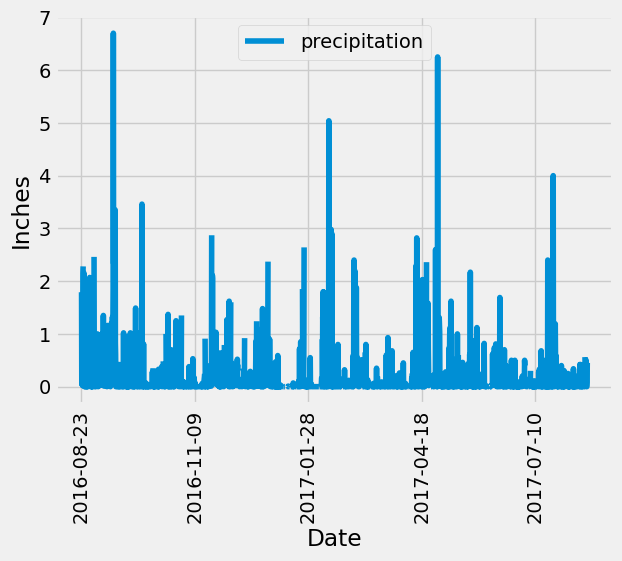

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#2016-08-23

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [160]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#2017-08-23
recent_date

# Calculate the date one year from the last date in data set.
 #2016-08-23
# query2 = text("SELECT Date FROM measurement WHERE Date = 2016-08-23;") #ORDER BY Date DESC LIMIT 1 ;")
# with engine.connect() as conn:
#     data2 = conn.execute(query2)

# for record in data2:
#     print(record)
    
# Perform a query to retrieve the data and precipitation scores

# for row in df:
#     if df["date"] >= '2016-08-23': #the date is a string/an object and prcp is a float
#         print(row)


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


('2017-08-23',)

In [165]:
# Calculate the date one year from the last date in data set.
 #2016-08-23
measurement = session.query(Measurement)
query2 = text("SELECT Date FROM measurement WHERE Date >2017-08-23 ORDER BY Date DESC LIMIT 1;")
with engine.connect() as conn:
    data2 = conn.execute(query2)

for record2 in data2:
    record2 = recent_date.Date(year=recent_date.yeara-1)
    print(record2)

AttributeError: Could not locate column in row for column 'Date'

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

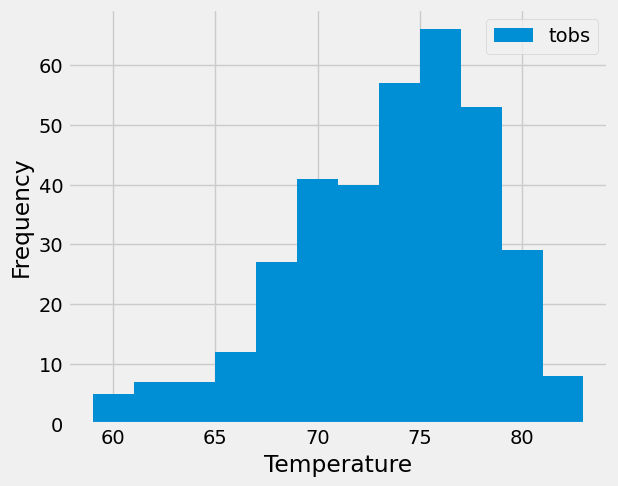

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()